## Student Performance Indicator

#### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Importing Libraries

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

#### Import the csv data as pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### 2.2 Dataset information 

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(
    - bachelor's degree, some college,
    - master's degree, 
    - associate's degree, 
    - high school
    
  )
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

### 3.2 Check Duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### 3.3 Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of columns

In [7]:
df.select_dtypes(include='object').nunique()

gender                         2
race_ethnicity                 5
parental_level_of_education    6
lunch                          2
test_preparation_course        2
dtype: int64

### 3.5 Check statistics of dataset

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.09,15.16,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.17,14.60,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.05,15.20,10.0,57.75,69.0,79.0,100.0


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### 3.6 Exploring data

In [9]:
for i in df.select_dtypes(include='object').columns:
    print(f'All values in {i}: {np.sort(df[i].unique())} \n----------')

All values in gender: ['female' 'male'] 
----------
All values in race_ethnicity: ['group A' 'group B' 'group C' 'group D' 'group E'] 
----------
All values in parental_level_of_education: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school'] 
----------
All values in lunch: ['free/reduced' 'standard'] 
----------
All values in test_preparation_course: ['completed' 'none'] 
----------


In [10]:
# define numeric and categorical features
numeric_features     = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# print columns
print(f'We have {len(numeric_features)} Numeric features: {numeric_features}')
print(f'We have {len(categorical_features)} Categorical features: {categorical_features}')

We have 3 Numeric features: ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average Score"

In [11]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average']     = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
math_full    = df[df['math_score']    == 100]['gender'].count()
writing_full = df[df['writing_score'] == 100]['gender'].count()
reading_full = df[df['reading_score'] == 100]['gender'].count()

print(f'Number of students with full marks in Maths:   {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths:   7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
math_less_20    = df[df['math_score']    <= 20]['gender'].count()
writing_less_20 = df[df['writing_score'] <= 20]['gender'].count()
reading_less_20 = df[df['reading_score'] <= 20]['gender'].count()

print(f'Number of students with full marks in Maths:   {math_less_20}')
print(f'Number of students with full marks in Writing: {writing_less_20}')
print(f'Number of students with full marks in Reading: {reading_less_20}')

Number of students with full marks in Maths:   4
Number of students with full marks in Writing: 3
Number of students with full marks in Reading: 1


#### Insights

 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

#### 4.1.1 Histogram & KDE

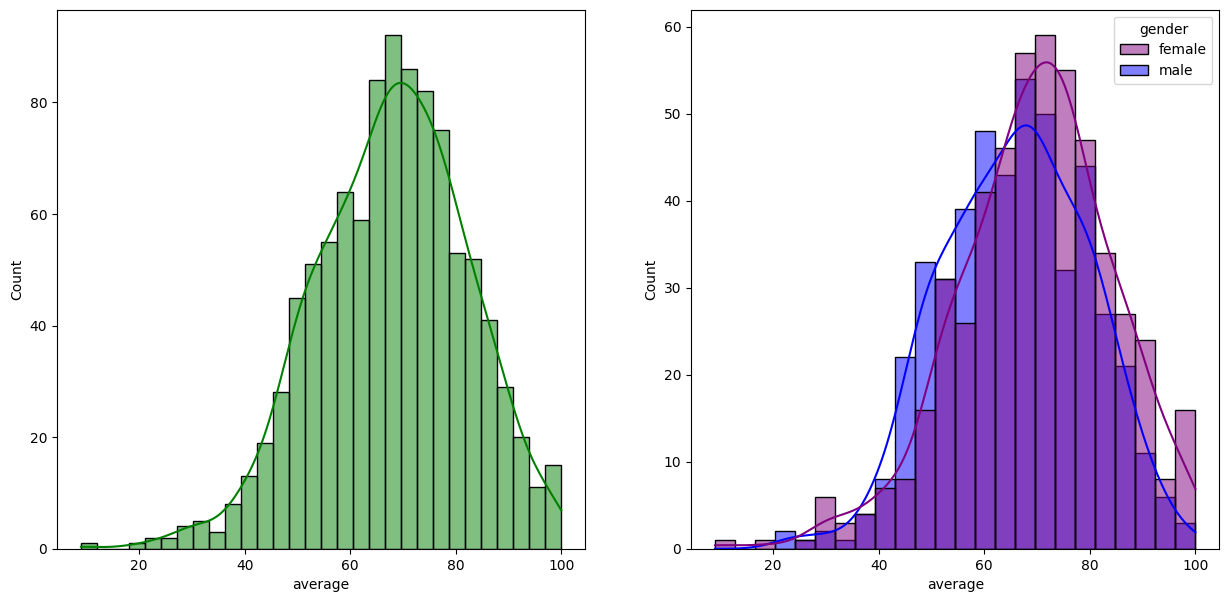

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender', palette={'female':'purple', 'male':'blue'})

plt.show()

#### Insights

- Female students tend to perform well than male students

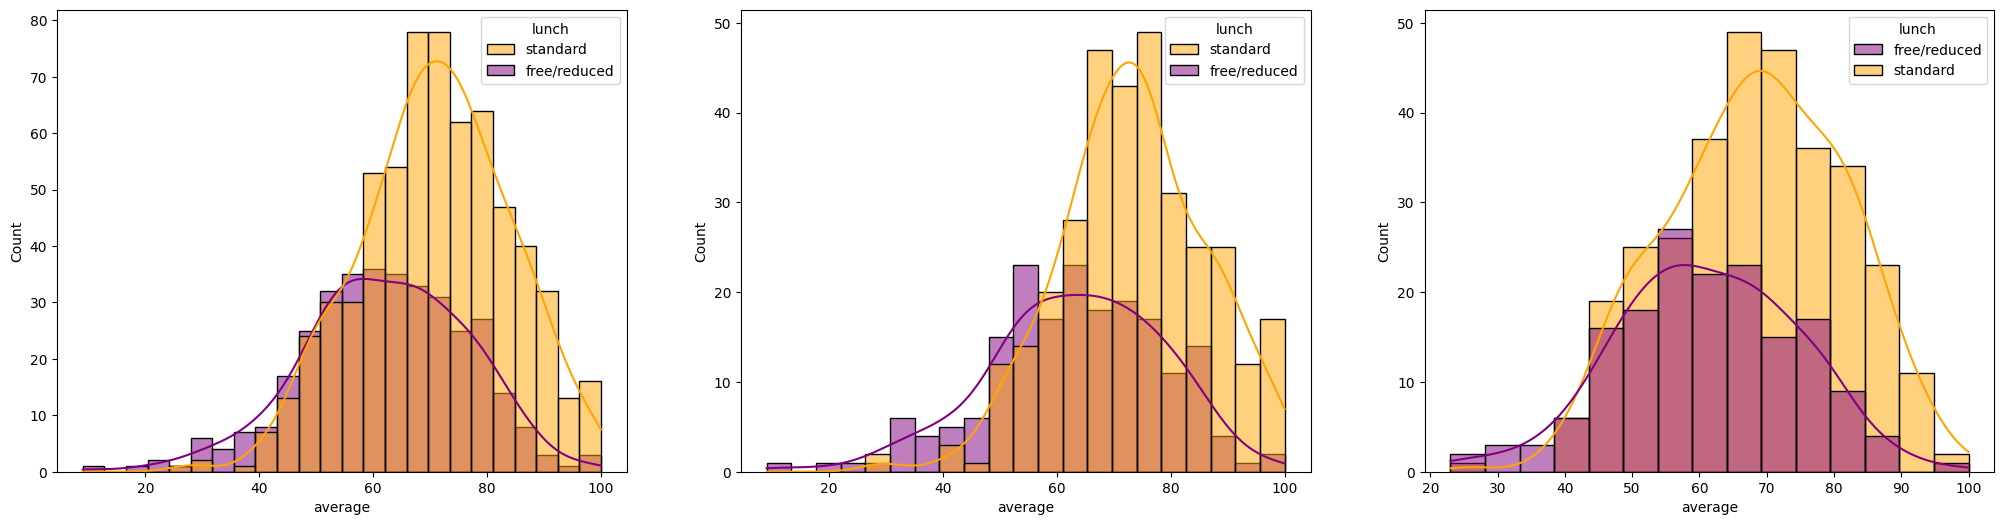

In [15]:
plt.subplots(1, 3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch', palette={'standard': 'orange', 'free/reduced': 'purple'})

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', palette={'standard': 'orange', 'free/reduced': 'purple'})

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', palette={'standard': 'orange', 'free/reduced': 'purple'})

plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

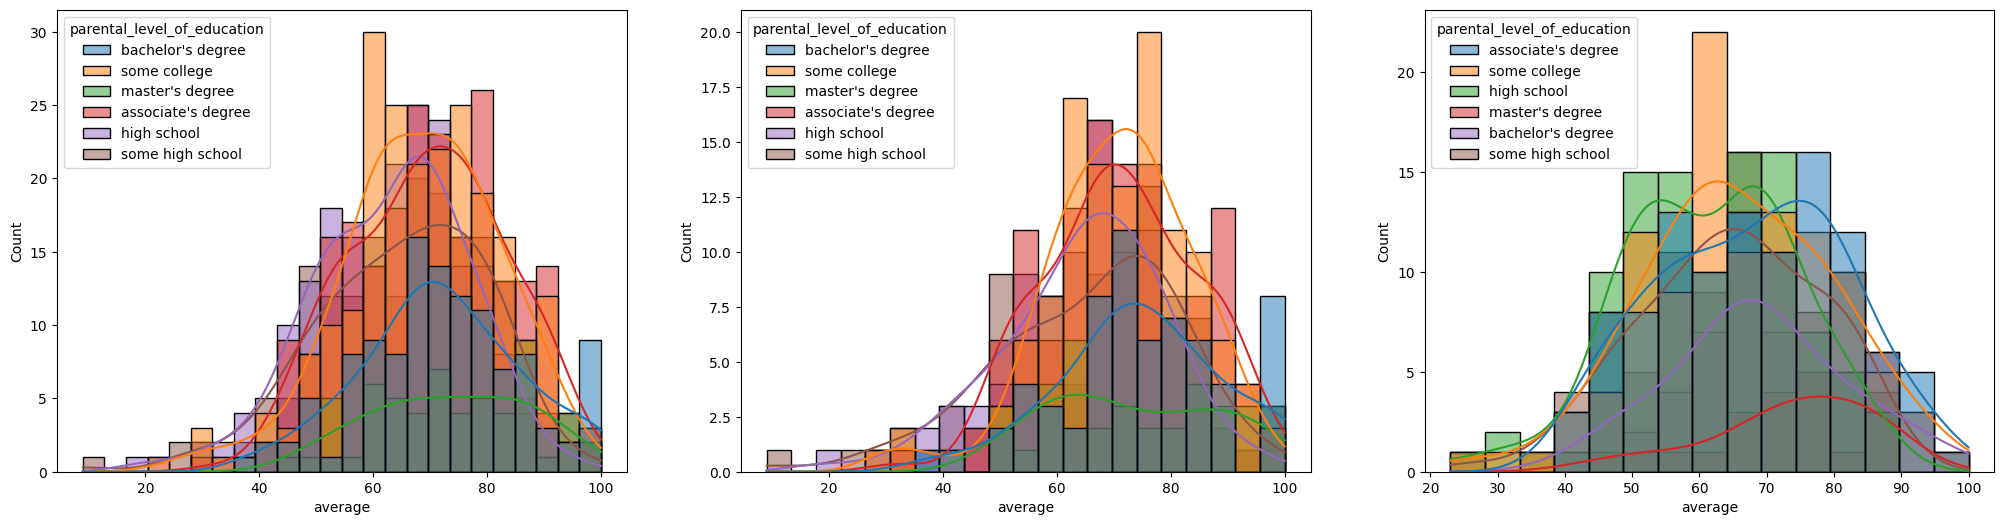

In [16]:
plt.subplots(1, 3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.

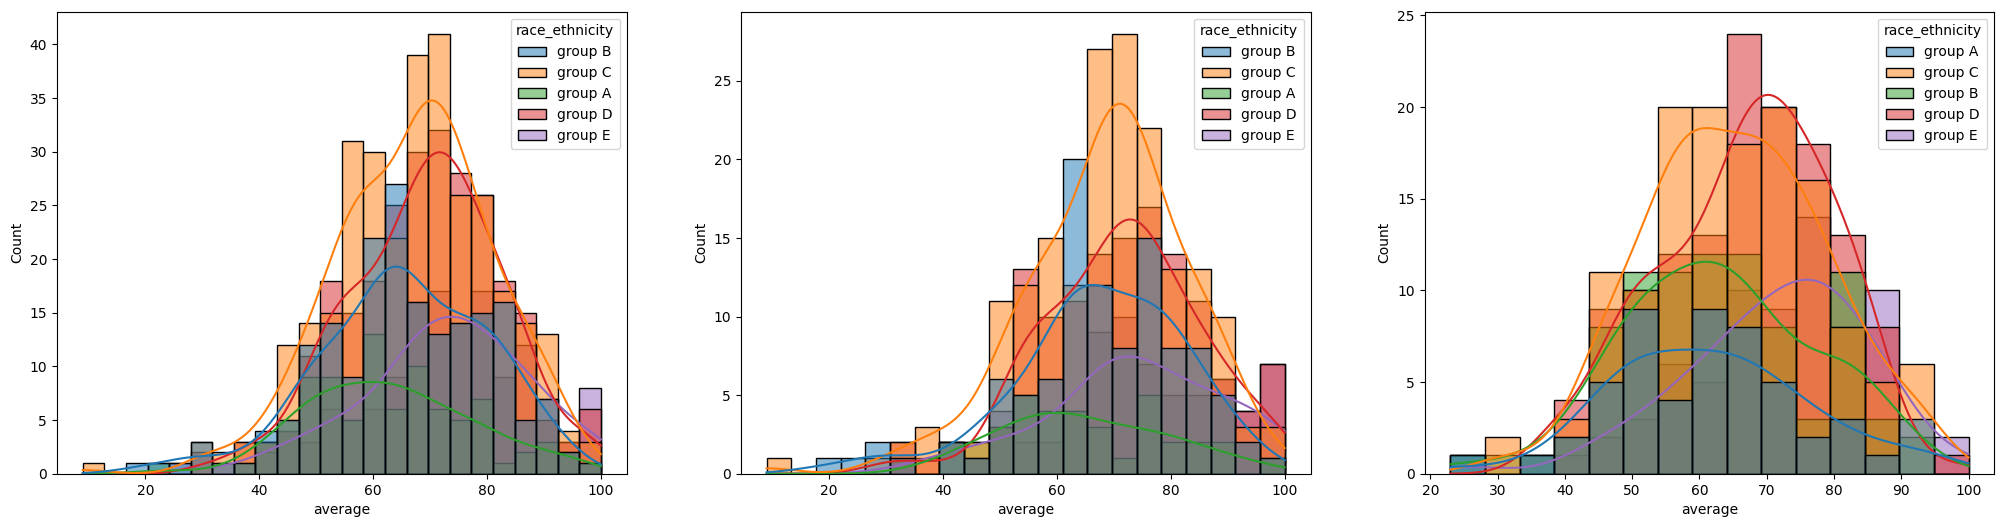

In [17]:
plt.subplots(1, 3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')

plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [18]:
from IPython.display import display

for i in categorical_features:
    share = df.groupby(i)[i].count() / df.shape[0] * 100
    share_df = pd.DataFrame(share).rename(columns={i: '% of total'})
    display(share_df)

,% of total
gender,
female,51.8
male,48.2


,% of total
race_ethnicity,
group A,8.9
group B,19.0
group C,31.9
group D,26.2
group E,14.0


,% of total
parental_level_of_education,
associate's degree,22.2
bachelor's degree,11.8
high school,19.6
master's degree,5.9
some college,22.6
some high school,17.9


,% of total
lunch,
free/reduced,35.5
standard,64.5


,% of total
test_preparation_course,
completed,35.8
none,64.2


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

---

### 4.1.2 Student's Performance

#### by gender

In [19]:
scores = ['total_score', 'math_score', 'reading_score', 'writing_score']
df.groupby('gender')[scores].mean()

,total_score,math_score,reading_score,writing_score
gender,,,,
female,208.71,63.63,72.61,72.47
male,197.51,68.73,65.47,63.31


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### by race_ethnicity

In [20]:
scores = ['total_score', 'math_score', 'reading_score', 'writing_score']
df.groupby('race_ethnicity')[scores].mean()

,total_score,math_score,reading_score,writing_score
race_ethnicity,,,,
group A,188.98,61.63,64.67,62.67
group B,196.41,63.45,67.35,65.60
group C,201.39,64.46,69.10,67.83
group D,207.54,67.36,70.03,70.15
group E,218.26,73.82,73.03,71.41


#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

#### by parental_level_of_education

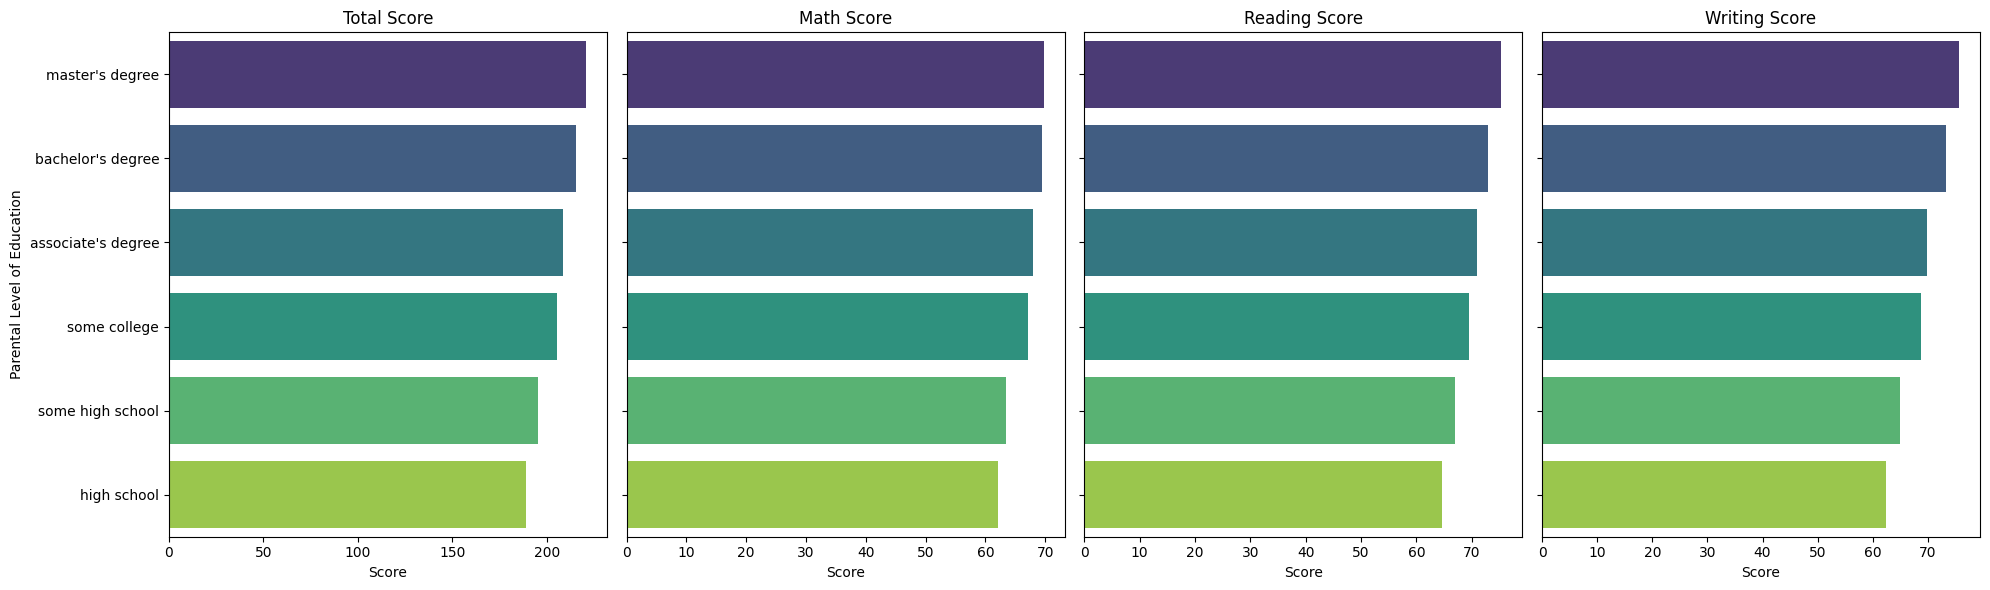

In [21]:
# Define the scores to analyze and group the data by parental level of education, calculating the mean for each score
scores = ['total_score', 'math_score', 'reading_score', 'writing_score']
grouped = df.groupby('parental_level_of_education')[scores].mean()

# Sort the grouped data in descending order for each score
sorted_grouped = {col: grouped[col].sort_values(ascending=False) for col in scores}

# Create 4 horizontal bar plots in a single row
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Iterate through each score and plot the data
for i, col in enumerate(scores):
    sns.barplot(
        x=sorted_grouped[col].values,  # Values for the x-axis (scores)
        y=sorted_grouped[col].index,   # Categories for the y-axis (parental education levels)
        ax=axes[i],                    # Subplot to use
        palette='viridis'              # Color palette
    )
    
    # Set the title and x-axis label for each subplot
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Parental Level of Education')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

In [22]:
scores = ['total_score', 'math_score', 'reading_score', 'writing_score']
df.groupby(['lunch'])[scores].mean()

,total_score,math_score,reading_score,writing_score
lunch,,,,
free/reduced,186.60,58.92,64.65,63.02
standard,212.51,70.03,71.65,70.82


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 5. Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers